# 实操案例 - 美国教育数据分析

## 简介

现有一份来自kaggle的美国教育相关的数据集，数据中一共有1497个样本，25个属性。我们先将这份数据的缺失值进行补充，并进行标准化，然后将这份数据中的学生数学成绩作为标签，利用其它的24个属性构建机器学习方法，来对学生成绩进行预测。

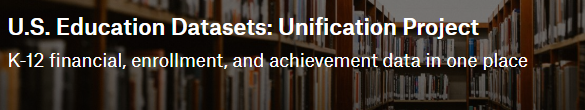

## 1. 认识数据

### 任务描述

使用pandas查看数据属性名称

### 相关知识

完成本任务所需的知识点：

1. 如何获取数据
2. 如何查看数据

### 操作步骤

#### 1.1 获取数据

这里是一份美国教育数据，以csv文件的形式保存，文件名为states_all.csv。部分数据如下：

In [2]:
!head -n 5 input_data/states_all.csv

PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1992_ALABAMA,ALABAMA,1992,,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,,,731634.0,208.0,252.0,207.0,
1992_ALASKA,ALASKA,1992,,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,,,122487.0,,,,
1992_ARIZONA,ARIZONA,1992,,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,,,673477.0,215.0,265.0,209.0,
1992_ARKANSAS,ARKANSAS,1992,,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,,145212.0,808.0,33511.0,34632.0,3

【案例实操】使用pandas读取数据：

In [2]:
import pandas as pd
df_states = pd.read_csv('input_data/states_all.csv')

#### 1.2 查看数据

获取数据后，我们可以对数据进行查看，比如查看数据有多少样本，每个样本有多少属性。

【案例实操】查看数据集的大小：

In [3]:
df_states.shape

(1715, 25)

【案例实操】查看数据集的列名：

In [4]:
df_states.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

其中，部分属性的描述如下：

| 属性名称 | 含义 |
|:-- |:-- |
| PRIMARY_KEY | 关键字 |
| STATE | 州 |
| YEAR | 年份 |
| ENROLL | 入学登记 |
| TOTAL_REVENUE | 总收益 |
| FEDERAL_REVENUE | 联邦政府收入 |
| STATE_REVENUE | 财政收入 |
| LOCAL_REVENUE | 地方收入 |
| TOTAL_EXPENDITURE | 总支出 |
| INSTRUCTION_EXPENDITURE | 教育支出 |
| SUPPORT_SERVICES_EXPENDITURE | 支持服务支出 |
| OTHER_EXPENDITURE | 其它支出 |
| CAPITAL_OUTLAY_EXPENDITURE | 资本支出费用 |
| GRADES_PK_G | 学前教育人数 |
| GRADES_KG_G | 幼儿园学生人数 |
| GRADES_4_G | 四年级学生人数 |
| GRADES_8_G | 八年级学生人数 |
| GRADES_12_G | 十二年级学生人数 |
| GRADES_1_8_G | 一到八年级学生人数 |
| GRADES_9_12_G | 九到十二年级学生人数 |
| GRADES_1_8_G | 一到八年级学生人数 |
| GRADES_ALL_G | 所有学生人数 |
| AVG_MATH_4_SCORE | 四年级数学平均成绩 |
| AVG_MATH_8_SCORE | 八年级数学平均成绩 |
| AVG_READING_4_SCORE | 四年级阅读平均成绩 |
| AVG_READING_8_SCORE | 八年级阅读平均成绩 |

根据这些属性名称，可以查看对应数据的分布情况。

【案例实操】查看特定列的数据值：

In [5]:
df_states['TOTAL_EXPENDITURE']

0        2653798.0
1         972488.0
2        3401580.0
3        1743022.0
4       27138832.0
           ...    
1710           NaN
1711           NaN
1712           NaN
1713           NaN
1714           NaN
Name: TOTAL_EXPENDITURE, Length: 1715, dtype: float64

当然这样看起来并不直观，可以对数据进行可视化。

【案例实操】绘制特定列数据分布的直方图：

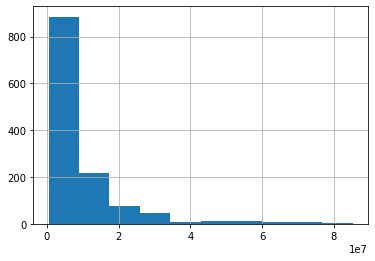

In [6]:
import matplotlib.pyplot as plt

df_states['TOTAL_EXPENDITURE'].hist()
plt.show()

## 2. 数据预处理

### 任务描述

使用sklearn填补数据缺失值，并进行标准化

### 相关知识

1. 数据预处理
2. 估算缺失值
3. 标准化

### 操作步骤

#### 2.1 数据预处理

我们需要做的事就是让模型从数据中学习到规律，然后对未知数据进行预测，而这份最开始的教育数据其中绝大多数是“有毛病”的。

【案例实操】检查数据集中的缺失值：

In [7]:
df_states.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

可以看出数据中有很多缺失值，不利于后期进行分析，所以我们在分析前需要进行数据的预处理。sklearn.preprocessing包提供了几个常用的函数和转换类，用它们将一个原始的特征向量转化为一个更适于数据分析的表示形式。一般来说，学习算法收益于数据集的标准形式。如果数据中存在异常点，稳健的数据规范或转换是更适合的。

#### 2.2 估算缺失值

##### 为什么要估算缺失值

由于各种原因，真实世界中的许多数据集都包含缺失数据，这类数据经常被编码成空格、NaNs，或者是其他的占位符。但是这样的数据集并不能被sklearn学习算法兼容，因为大多的学习算法都默认假设数组中的元素都是数值，因而所有的元素都有自己的意义。 使用不完整的数据集的一个基本策略就是舍弃掉整行或整列包含缺失值的数据。但是这样就付出了舍弃可能有价值数据（即使是不完整的 ）的代价。 处理缺失数值的一个更好的策略就是从已有的数据推断出缺失的数值。

##### Imputer估值器

sklearn的impute模块提供了很多Imputer用来估算缺失值，其中SimpleImputer是最常用的缺失值估算器。

【示例代码】使用估算器填充缺失值：

In [8]:
#【示例代码】
import numpy as np
from sklearn.impute import SimpleImputer
data = [[np.nan, 2], [6, np.nan], [7, 4],[np.nan, 4]]
#缺失值为nan，沿着每一列，使用平均值来代替缺失值
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imp.fit_transform(data)
data

array([[6.5       , 2.        ],
       [6.        , 3.33333333],
       [7.        , 4.        ],
       [6.5       , 4.        ]])

其中，strategy参数用来选择代替缺失值方法：

- mean: 表示使用平均值代替缺失值；
- median: 表示使用中位数代替缺失值；
- most_frequent: 表示使用出现频率最多的值代替缺失值

missing_values参数表示何为缺失值：np.nan或者0

【案例实操】使用均值填充数据集中的缺失值

由于前3列没有缺失值，所以使用估算器只对其余列使用均值进行填充。代码如下：

In [10]:
arr_imputed = imp.fit_transform(df_states.iloc[:, 3:])

df_states_imputed = pd.concat([
    df_states.iloc[:,0:3],
    pd.DataFrame(arr_imputed, columns=df_states.columns[3:])],
    axis=1
)
df_states_imputed.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

缺失值已全被填充。下一步进行标准化处理。

#### 2.3 标准化

##### 为什么要进行标准化

对于大多数机器学习算法而言，数据集的标准化是基本要求。这是因为，如果特征不服从或者近似服从标准正态分布（即，零均值、单位标准差的正态分布）的话，算法的表现会大打折扣。实际上，我们经常忽略数据的分布形状，而仅仅做零均值、单位标准差的处理。在一个机器学习算法的目标函数里的很多元素所有特征都近似零均值，方差具有相同的阶。如果某个特征的方差的数量级大于其它的特征，那么，这个特征可能在目标函数中占主导地位，这使得模型不能从其它特征有效地学习。

##### Z-score标准化

这种方法基于原始数据的均值mean和标准差standard deviation进行数据的标准化。将特征A的原始值x使用z-score标准化到x。z-score标准化方法适用于特征A的最大值和最小值未知的情况，或有超出取值范围的离群数据的情况。将数据按其特征(按列进行)减去其均值，然后除以其方差。最后得到的结果是，对每个特征/每列来说所有数据都聚集在0附近，方差值为1。数学公式如下：
$$
x'=\frac{x-x_{mean}}{x_{std}}
$$

sklearn.preprocessing模块的StandardScaler可用于Z-score标准化。

【示例代码】使用StandardScaler进行Z-score（也叫0均值）标准化：

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
X_scaled = scaler.fit_transform(X_train)

X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

【示例代码】查看缩放后的数据的均值和标准方差：

In [12]:
X_scaled.mean(axis=0), X_scaled.std(axis=0)

(array([0., 0., 0.]), array([1., 1., 1.]))

可见，经缩放（标准化）后，均值为0，标准方差为1.

##### Min-max标准化
Min-max标准化方法是对原始数据进行线性变换。设$x_{min}$和$x_{max}$分别为特征A的最小值和最大值，将A的一个原始值x通过min-max标准化映射成在区间`[0,1]`中的值x'，其公式为：

$$
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

sklearn.preprocessing模块的MinMaxScaler可用于Min-max标准化。

【示例代码】使用MinMaxScaler进行Min-max标准化：

In [66]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X_train)
X_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

##### MaxAbs标准化

MaxAbs的工作原理与Min-max非常相似，但是它只通过除以每个特征的最大值将训练数据特征缩放至`[-1, 1]`范围内，这就意味着，训练数据应该是已经零中心化或者是稀疏数据。公式如下：

$$
x' = \frac{x}{x_{max}}
$$

sklearn.preprocessing模块的MaxAbsScaler可用于MaxAbs标准化。

【示例代码】使用MaxAbsScaler进行MaxAbs标准化：

In [67]:
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = MaxAbsScaler()
X_maxabs = scaler.fit_transform(X_train)
X_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

【案例实操】使用Min-max标准化对填充缺失值后的数值列进行标准化：

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
arr_scaled = scaler.fit_transform(df_states_imputed.iloc[:, 3:])

df_states_scaled = pd.concat([
    df_states.iloc[:, 0:3],
    pd.DataFrame(arr_scaled, columns=df_states.columns[3:])],
    axis=1
)
df_states_scaled.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,0.139494,0.024937,0.027428,0.032591,0.019222,0.025603,0.027830,...,0.109179,0.110018,0.077839,0.138806,0.134259,0.104060,0.262295,0.300000,0.482759,0.626335
1,1992_ALASKA,ALASKA,1992,0.139494,0.006579,0.007607,0.014158,0.005543,0.005785,0.005328,...,0.010578,0.010906,0.008354,0.138806,0.134259,0.008479,0.726679,0.675439,0.686313,0.626335
2,1992_ARIZONA,ARIZONA,1992,0.139494,0.031463,0.026796,0.026909,0.043463,0.034417,0.026782,...,0.104034,0.092014,0.070262,0.138806,0.134259,0.094935,0.377049,0.485714,0.517241,0.626335
3,1992_ARKANSAS,ARKANSAS,1992,0.139494,0.014043,0.014816,0.018835,0.015312,0.014868,0.015991,...,0.061483,0.065704,0.050580,0.138806,0.134259,0.058534,0.295082,0.357143,0.551724,0.626335
4,1992_CALIFORNIA,CALIFORNIA,1992,0.139494,0.290636,0.204981,0.325050,0.211150,0.314211,0.322510,...,0.846581,0.724528,0.540714,0.138806,0.134259,0.813794,0.262295,0.428571,0.396552,0.626335


## 3. 数学成绩预测

### 任务描述

使用sklearn对教育数据中数学成绩分数（`GRADES_12_G`）进行预测。

### 相关知识

1. 构建线性回归模型进行预测

### 操作步骤

#### 3.1 特征选择

因为线性回归模型需要数据集的特征必须为数值，所以非数值列要去掉，只保留数值特征。同时，被预测的目标列`GRADES_12_G`也要删除。

【案例实操】删除`RIMARY_KEY`,`STATE`, `YEAR`, `GRADES_12_G`列：

In [25]:
df_states_dropped = df_states_scaled.drop(['PRIMARY_KEY','STATE', 'YEAR', 'GRADES_12_G'], axis = 1)
df_states_dropped.head().T

,0,1,2,3,4
ENROLL,0.139494,0.139494,0.139494,0.139494,0.139494
TOTAL_REVENUE,0.024937,0.006579,0.031463,0.014043,0.290636
FEDERAL_REVENUE,0.027428,0.007607,0.026796,0.014816,0.204981
STATE_REVENUE,0.032591,0.014158,0.026909,0.018835,0.325050
LOCAL_REVENUE,0.019222,0.005543,0.043463,0.015312,0.211150
TOTAL_EXPENDITURE,0.025603,0.005785,0.034417,0.014868,0.314211
INSTRUCTION_EXPENDITURE,0.027830,0.005328,0.026782,0.015991,0.322510
SUPPORT_SERVICES_EXPENDITURE,0.022960,0.008139,0.033481,0.013254,0.323364
OTHER_EXPENDITURE,0.105012,0.105012,0.105012,0.105012,0.105012
CAPITAL_OUTLAY_EXPENDITURE,0.015801,0.002423,0.058408,0.012977,0.199000


#### 3.2 创建线性回归模型进行预测

对数据预处理完成之后，就可以对数学成绩分数进行预测，这是一个回归问题，因此可以建立一个线性回归模型来进行预测。

【案例实操】创建线性回归模型，实现数学成绩分数的预测：

In [22]:
# 导入sklearn的线性回归模型类
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# 指定输入列（特征）
data = df_states_dropped
# 指定目标列（标签）
labels = df_states_scaled['GRADES_12_G']
# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, 
    test_size=0.2, 
    random_state=666
)
# 创建线性回归模型对象
lr = LinearRegression()
# 训练模型（拟合训练数据）
lr.fit(X_train, y_train)
# 预测测试数据
y_pred = lr.predict(X_test)

#### 3.3 评估模型性能

评估回归模型的性能指标，通常使用R2分数对预测结果进行打分。

【案例实操】对线性回归模型的预测结果进行R2分数评估，并输出R2分数：

In [24]:
# 导入R2打分函数
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print('R2分数为：{:.2f}'.format(score))

R2分数为：0.99
